# Personal Netflix Data Analysis

Special thanks to:

- https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/


### Step 0. Download your Netflix Data

In this project I'll use my Netflix data. To download your own you need to do the following:

- Go to this page (https://www.netflix.com/account/getmyinfo)
- Login into your account
- Click on "Account" and then "Download your personal information"

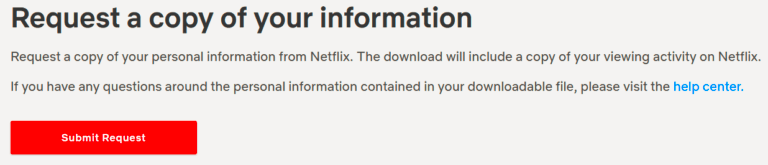

- Click "Submit a Request"
- Netflix will send you a confirmation email, which you'll need to click

Netflix will email you when your report is available to download.

The download will arrive as a .zip file that contains roughly a dozen folders, most of which contain data tables in .csv format. There are also two PDFs with additional information about the data.

### Step 1. Load your Data into a Jupyter Notebook

You'll find the CSV file of interest for this project inside the "Content_Interaction" folder.

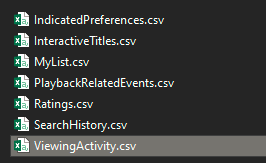

Now you need to open a Jupyter Notebook to analyze the data. I've personally used Miniconda to create an environment and open a notebook.

Once you've opened the notebook you can start to load the data into it. Then import the pandas library and read the csv file creating a dataframe.

The first backslash in your string is being interpreted as a special character, in fact because it's followed by a "U" it's being interpreted as the start of a unicode code point.

To fix this you need to escape the backslashes in the string.

source: https://stackoverflow.com/questions/37400974/unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3-trunca

In [239]:
import pandas as pd

df_netflix = pd.read_csv('../data/ViewingActivityAnon.csv')

Now, let's do a quick preview of the data to make sure everything looks correct. We'll start with DataFrame.shape, which will tell us the number of rows and columns in the dataframe we've just created.

Below that we'll print the head of the dataframe, just to see how it looks like.

First of all, you might want to drop some unnecessary columns for this project.

In [240]:
# df_netflix.drop(['Attributes', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1, inplace=True)

In [241]:
df_netflix.shape

(3439, 6)

In [242]:
df_netflix.head()

,Unnamed: 0,Start Time,Profile Name,Duration,Title,Device Type
0,4827,2019-12-31 17:25:31+01:00,Utente2,01:24:42,Mister Felicità,Samsung Jazz-M UHD TV Smart TV
1,4828,2019-12-31 17:22:07+01:00,IO,00:21:19,Friends: Stagione 7: Notte in bianco (Episodio...,DefaultWidevineAndroidTablets
2,4829,2019-12-31 16:29:08+01:00,Utente5,00:21:23,Friends: Stagione 4: Miglioramento di carriera...,Sony PS4
3,4830,2019-12-31 16:06:14+01:00,Utente5,00:21:52,Friends: Stagione 4: Sei ore di riflessione (E...,Sony PS4
4,4831,2019-12-31 15:41:14+01:00,Utente5,00:21:25,Friends: Stagione 4: La scoperta di un talento...,Sony PS4


### Step 2. Prepare the Data for the Analysis

In this step we'll clean the data to get them ready for our analysis.

Notice that I've anonymized my data and you probably want to do the same so, to change the name of your Profile Name to something like "IO" instead of your actual name do the following.

In [243]:
# df_netflix["Profile Name"].replace("ActualName", "FakeName", inplace=True)

# df_netflix.replace("ActualName", "FakeName")

Then I want to select only my profile's rows.

In [244]:
df_IO = df_netflix[df_netflix['Profile Name'] == "IO"]

In [245]:
df_IO.shape

(982, 6)

Now we'll look at the types of our columns with the command dtypes

In [246]:
df_IO.dtypes

Unnamed: 0       int64
Start Time      object
Profile Name    object
Duration        object
Title           object
Device Type     object
dtype: object

As we can see here, all three columns are stored as object, which means they're strings. That's fine for the Title column, but we need to change the two time-related columns into the correct datatypes before we can work with them.

Specifically, we need to do the following:

1. Convert Start Time to datetime (a data and time format pandas can understand and perform calculations with)
2. Convert Start Time from UTC to our local timezone
3. Convert Duration to timedelta (a time duration format pandas can understand and perform calculations with)

In [247]:
df_IO['Start Time'] = pd.to_datetime(df_IO['Start Time'], utc=True)

C:\Users\GRMITALY\AppData\Local\Temp\ipykernel_5488\3850353690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IO['Start Time'] = pd.to_datetime(df_IO['Start Time'], utc=True)


In [248]:
df_IO.dtypes

Unnamed: 0                    int64
Start Time      datetime64[ns, UTC]
Profile Name                 object
Duration                     object
Title                        object
Device Type                  object
dtype: object

In [249]:
# change the Start Time column into the dataframe's index
df_IO = df_IO.set_index('Start Time')

# convert from UTC timezone to eastern time (Rome in my case)
df_IO.index = df_IO.index.tz_convert('Europe/Rome')

# reset the index so that Start Time becomes a column again
df_IO = df_IO.reset_index()

#double-check that it worked
df_IO.head(1)

,Start Time,Unnamed: 0,Profile Name,Duration,Title,Device Type
0,2019-12-31 17:22:07+01:00,4828,IO,00:21:19,Friends: Stagione 7: Notte in bianco (Episodio...,DefaultWidevineAndroidTablets


In my case, Rome is 1 hour ahead of UTC, so this is a confirmation that what we did worked right.

Timedelta is a measure of time duration that pandas understands

In [250]:
df_IO['Duration'] = pd.to_timedelta(df_IO['Duration'])

In [251]:
df_IO.dtypes

Start Time      datetime64[ns, Europe/Rome]
Unnamed: 0                            int64
Profile Name                         object
Duration                    timedelta64[ns]
Title                                object
Device Type                          object
dtype: object

### Step 3. Do your analysis!

Now it's all set, you can do the analysis you prefer with this dataframe.

I want to create a new dataframe that contains only rows where the Title contains 'Sons of Anarchy', a great TV show that I've watched during this time.

We can do this using str.contains(), giving to it two arguments:

- The substring 'Sons of Anarchy'
- regex=False, which tells the function that the previous argument is a string and not a regular expression

In [252]:
soa = df_IO[df_IO['Title'].str.contains('Sons of Anarchy', regex=False)]

In [253]:
soa.sample(5)

,Start Time,Unnamed: 0,Profile Name,Duration,Title,Device Type
285,2019-09-25 19:56:04+02:00,5849,IO,0 days 00:03:08,Sons of Anarchy: Stagione 6: Re Matto (Episodi...,DefaultWidevineAndroidTablets
402,2019-07-27 22:39:39+02:00,6309,IO,0 days 00:38:12,Sons of Anarchy: Stagione 1: Il punto debole (...,DefaultWidevineAndroidTablets
395,2019-08-02 10:02:25+02:00,6283,IO,0 days 00:34:47,Sons of Anarchy: Stagione 2: Un nuovo nemico (...,DefaultWidevineAndroidTablets
372,2019-08-12 20:10:43+02:00,6194,IO,0 days 00:13:26,Sons of Anarchy: Stagione 2: Giornata cruenta ...,DefaultWidevineAndroidTablets
289,2019-09-24 09:22:52+02:00,5866,IO,0 days 00:48:33,Sons of Anarchy: Stagione 6: Poenitentia (Epis...,DefaultWidevineAndroidTablets


In [254]:
soa.shape

(189, 6)

Sample lets us inspect a random ten rows of our new dataframe. So, if all the rows extracted by sample contains Sons of Anarchy episodes, we could be pretty confident things worked as expected.

We noticed in our data exploration that when something like an episode preview auto-plays on the homepage, it counts as a view in our data.

However, watching two seconds of a trailer as you scroll past isn't the same as actually watching an episode! So let's filter our dataframe down a little bit further by limiting it to only rows where the Duration value is greater than one minute. 

In [255]:
soa = soa[(soa['Duration'] > '0 days 00:01:00')]

In [256]:
soa.shape

(178, 6)

Now let's look at how much time I've spent watching Sons of Anarchy by using the sum function.

In [257]:
soa['Duration'].sum()

Timedelta('3 days 04:31:25')

As we can see, I've watched Sons of Anarchy for a total time of 3 days, 4 hours, 31 minutes, and 25 seconds.

Let's move deeper by computing on which day I've watched the most this show and during which hours of the day I've started an episode.

We'll answer these two questions by adding two new columns to our dataframe and by using dt functionalities.

In [258]:
soa['Weekday'] = soa['Start Time'].dt.weekday

In [259]:
soa['Hour'] = soa['Start Time'].dt.hour

In [260]:
soa.head(2)

,Start Time,Unnamed: 0,Profile Name,Duration,Title,Device Type,Weekday,Hour
226,2019-10-11 15:38:06+02:00,5699,IO,0 days 01:14:33,Sons of Anarchy: Stagione 7: Il testamento di ...,DefaultWidevineAndroidTablets,4,15
227,2019-10-10 16:14:25+02:00,5705,IO,0 days 00:36:15,Sons of Anarchy: Stagione 7: Rosa rossa (Episo...,DefaultWidevineAndroidTablets,3,16


It's necessary to group some rows as I've watched some episodes dividing them in multiple parts

In [261]:
soa_grouped = soa.groupby(['Profile Name', 'Title', 'Weekday'])[['Profile Name', 'Title', 'Weekday']].apply(','.join).reset_index()
soa_grouped

,Profile Name,Title,Weekday,0
0,IO,Sons of Anarchy: Stagione 1: Assalto al furgon...,3,"Profile Name,Title,Weekday"
1,IO,Sons of Anarchy: Stagione 1: Assalto al furgon...,4,"Profile Name,Title,Weekday"
2,IO,Sons of Anarchy: Stagione 1: Caccia all'uomo (...,1,"Profile Name,Title,Weekday"
3,IO,Sons of Anarchy: Stagione 1: Caccia all'uomo (...,3,"Profile Name,Title,Weekday"
4,IO,Sons of Anarchy: Stagione 1: Comincia la guerr...,4,"Profile Name,Title,Weekday"
...,...,...,...,...
108,IO,Sons of Anarchy: Stagione 7: Nuove alleanze (E...,5,"Profile Name,Title,Weekday"
109,IO,Sons of Anarchy: Stagione 7: Rosa rossa (Episo...,3,"Profile Name,Title,Weekday"
110,IO,Sons of Anarchy: Stagione 7: Spirali di violen...,4,"Profile Name,Title,Weekday"
111,IO,Sons of Anarchy: Stagione 7: Vendetta (Episodi...,2,"Profile Name,Title,Weekday"


In [262]:
soa_grouped.columns

Index(['Profile Name', 'Title', 'Weekday', 0], dtype='object')

In [263]:
soa_grouped.drop(0, axis=1, inplace=True)

For the next step we'll need to import and use matplotlib, because we want to make charts with our data, to visualize our results.

In [264]:
%matplotlib inline

import matplotlib
import seaborn as sns

Now, let's plot a chart of my viewing habits by day of the week. To do this, we'll need to work through a few steps:

- Tell pandas the order we want to chart the days in using pd.Categorical — by default, it will plot them in descending order based on the number of episodes watched on each day, but when looking at a graph, it'll be more intuitive to see the data in Monday-Sunday order.
- Count the number of episodes I viewed on each day in total
- Sort and plot the data

In [265]:
soa_grouped['Weekday'] = pd.Categorical(soa_grouped['Weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

In [266]:
soa_grouped['Weekday'].value_counts()

1    21
4    17
3    16
0    15
2    15
5    15
6    14
Name: Weekday, dtype: int64

In [267]:
data = {'Day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'numEp':[21, 17, 16, 15, 15, 15, 14]}
soa_byDay = pd.DataFrame(data)

In [268]:
soa_byDay_ord = soa_byDay.sort_values(by='numEp', ascending=False)

Text(0.5, 1.0, 'Sons of Anarchy: number of episodes watched by day \n')

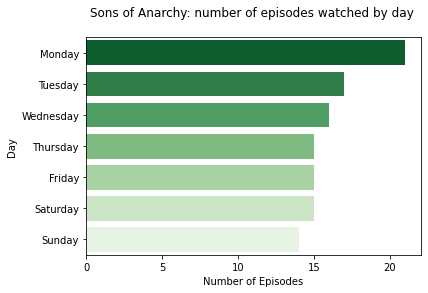

In [269]:
import matplotlib.ticker as ticker

ax = sns.barplot(x='numEp', y='Day', data=soa_byDay_ord, palette='Greens_r')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Number of Episodes')
ax.set_title('Sons of Anarchy: number of episodes watched by day \n')

Text(0.5, 1.0, 'Sons of Anarchy: number of episodes watched by day \n')

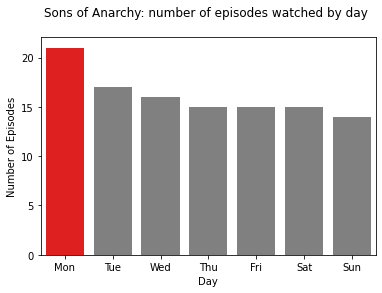

In [270]:
colors = ['grey' if (x < max(soa_byDay.numEp)) else 'red' for x in soa_byDay.numEp]
ax = sns.barplot(x='Day', y='numEp', data=soa_byDay, palette=colors)
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(ylabel='Number of Episodes')
ax.set_title('Sons of Anarchy: number of episodes watched by day \n')

## More

Group by device type

In [271]:
df_IO.columns

Index(['Start Time', 'Unnamed: 0', 'Profile Name', 'Duration', 'Title',
       'Device Type'],
      dtype='object')

In [272]:
devices = df_IO['Device Type'].value_counts().to_frame().reset_index().rename(columns={'index':'Device', 'values':'count'})
devices

,Device,Device Type
0,DefaultWidevineAndroidTablets,778
1,Sony PS4,81
2,Android DefaultWidevineL3Phone Android Phone,75
3,Netflix Windows App - Cadmium Windows Mobile,26
4,Samsung 2014 MStar DTV,14
5,Apple iPad 2 3G GSM,8


Longest film

In [273]:
df_IO.iloc[df_IO['Duration'].idxmax()]

Start Time          2019-01-22 21:39:12+01:00
Unnamed: 0                               7892
Profile Name                               IO
Duration                      0 days 01:37:55
Title           Unbreakable - Il predestinato
Device Type                          Sony PS4
Name: 894, dtype: object

Shortest episode

In [274]:
df_IO.iloc[df_IO['Duration'].idxmin()]

Start Time                              2019-11-06 15:31:03+01:00
Unnamed: 0                                                   5509
Profile Name                                                   IO
Duration                                          0 days 00:00:01
Title           Friends: Stagione 2: Il grande Marcel: Parte 2...
Device Type                                              Sony PS4
Name: 162, dtype: object

### The End

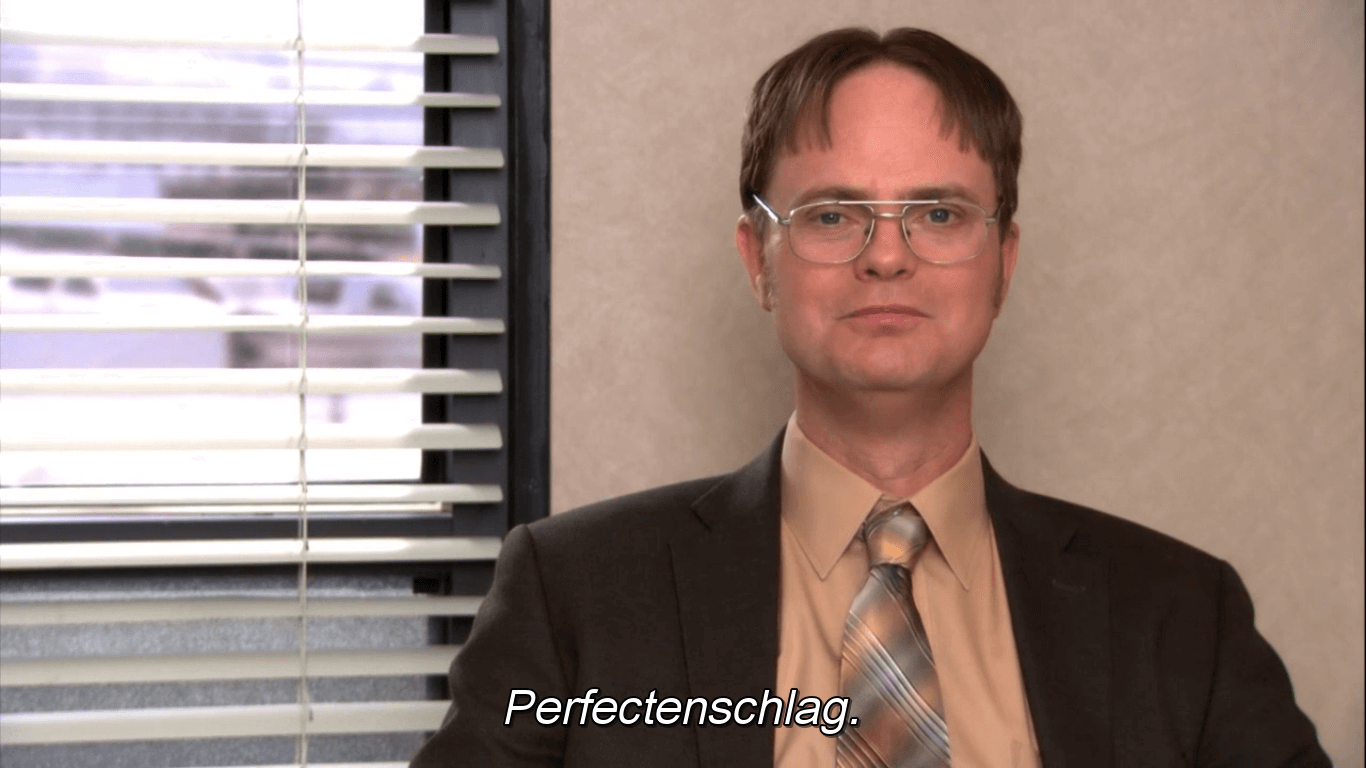